**Exploratory Data Analysis using Python**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
link = "https://github.com/theomkulpe/exploratory-data-analysis-retail/raw/main/SampleSuperstore.csv"
data = pd.read_csv(link)

Understanding the Data

In [4]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
data.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [6]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
data.shape

(9994, 13)

In [8]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

Checking for unique values

In [9]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [10]:
data["Region"].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

Cleaning the data

In [11]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [12]:
data_new = data.drop(['Country', 'City', 'State', 'Postal Code', 'Region'], axis = 1)

In [13]:
data_new.head()

,Ship Mode,Segment,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Office Supplies,Storage,22.3680,2,0.20,2.5164


Relationship analysis

In [14]:
correlation = data_new.corr()

<ipython-input-14-a2050b50ba61>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data_new.corr()


<Axes: >

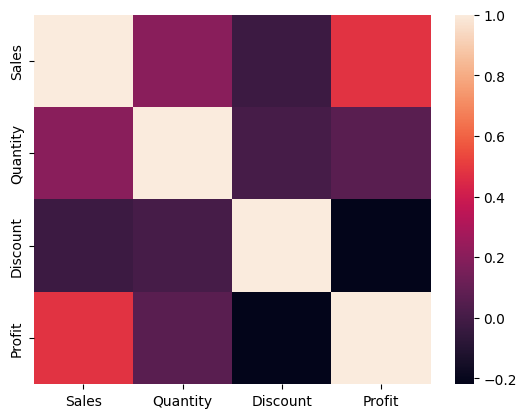

In [15]:
sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels = correlation.columns)

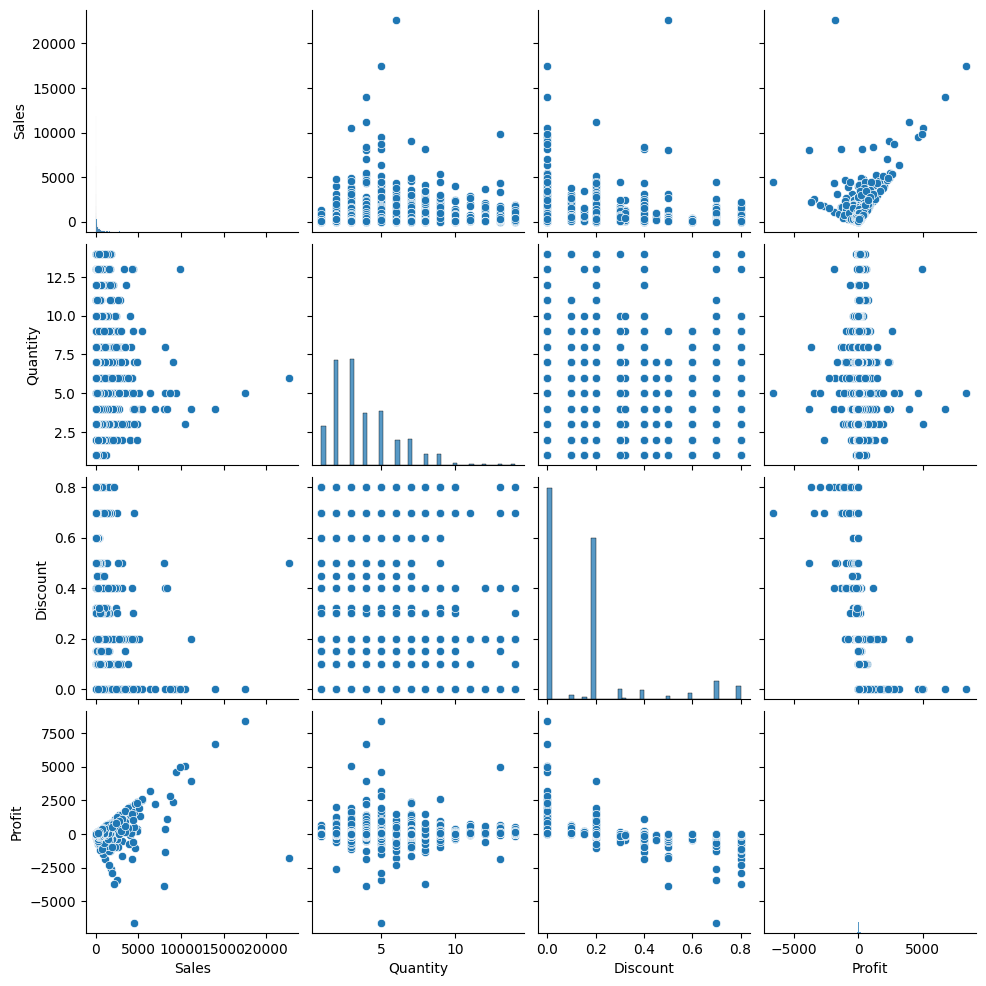

In [16]:
sns.pairplot(data_new)

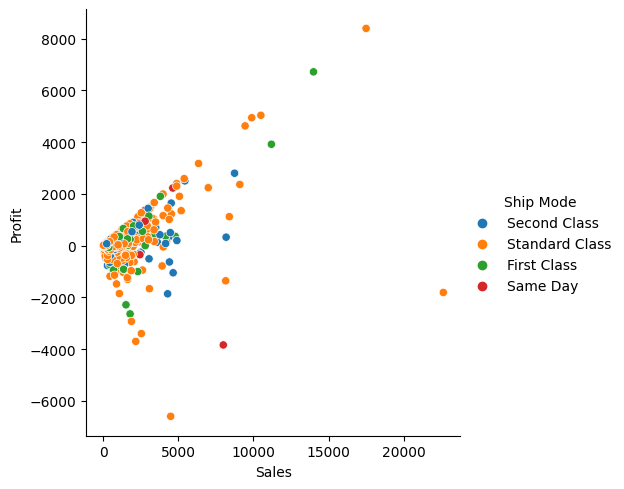

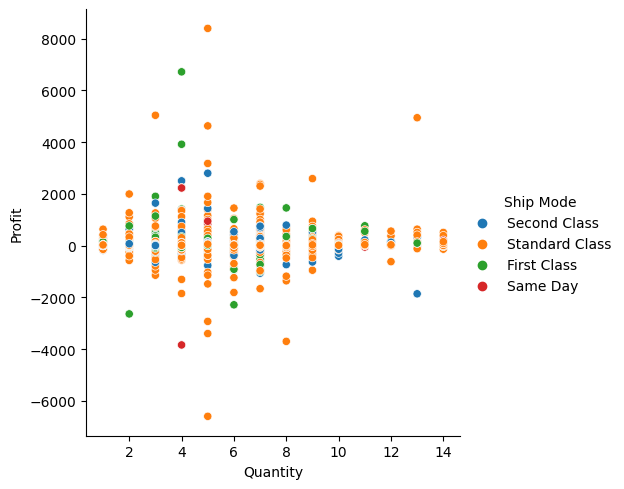

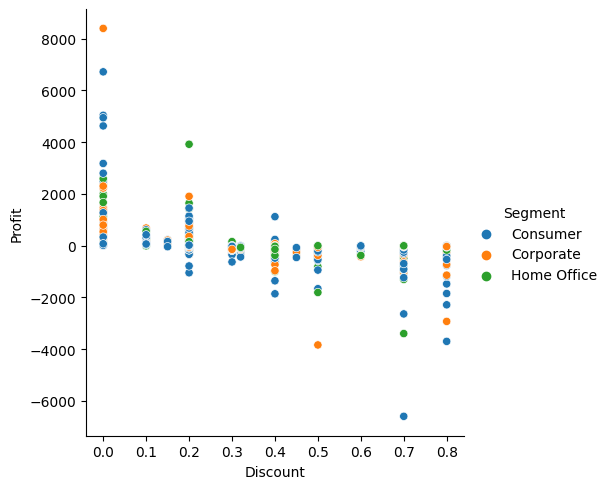

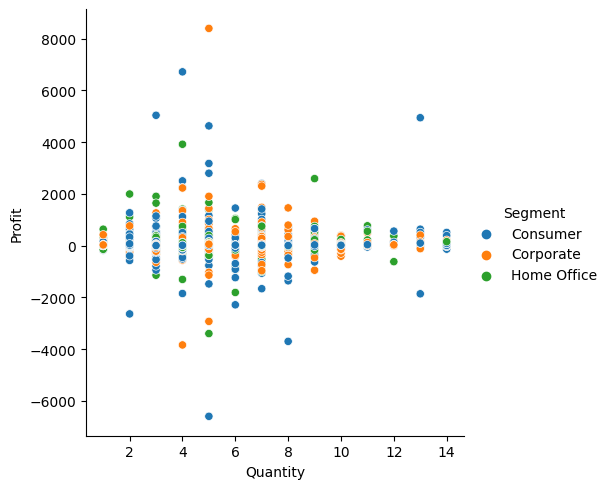

In [23]:
sns.relplot(x = "Sales", y = "Profit", hue = "Ship Mode", data = data_new)
sns.relplot(x = "Quantity", y = "Profit", hue = "Ship Mode", data = data_new)
sns.relplot(x = "Discount", y = "Profit", hue = "Segment", data = data_new)
sns.relplot(x = "Quantity", y = "Profit", hue = "Segment", data = data_new)

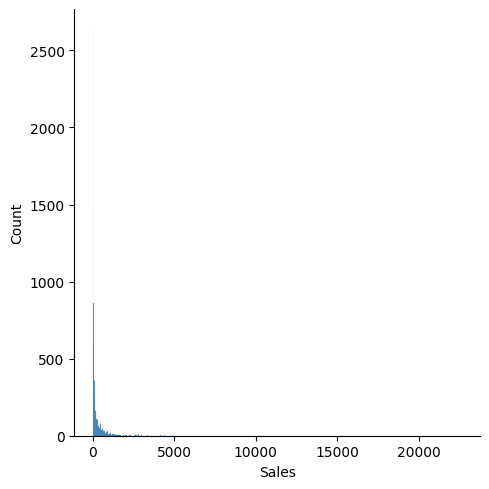

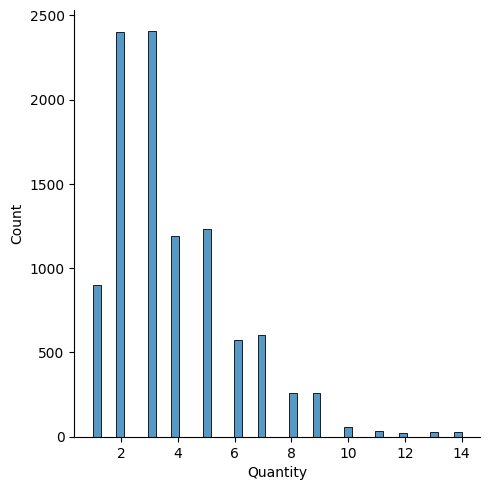

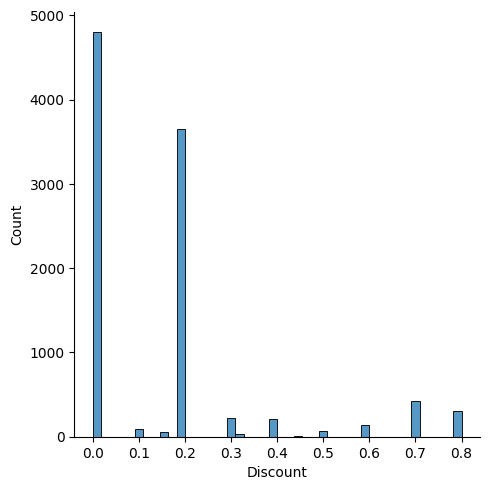

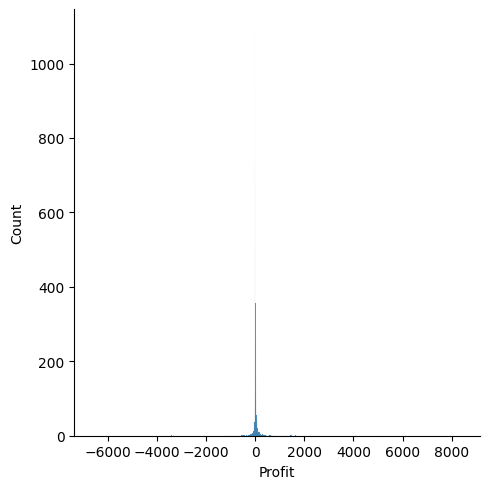

In [24]:
sns.displot(data_new["Sales"])
sns.displot(data_new["Quantity"])
sns.displot(data_new["Discount"])
sns.displot(data_new["Profit"])

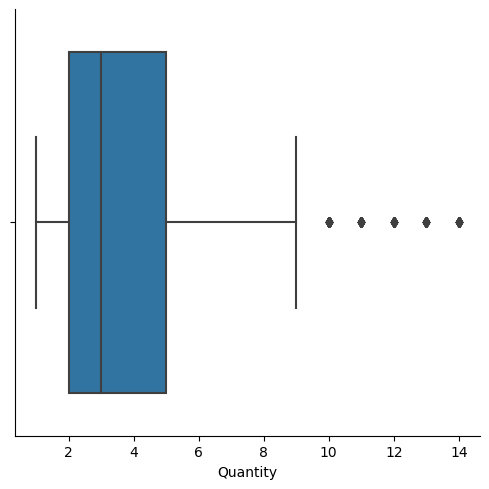

In [22]:
sns.catplot(x = "Sales", kind = "box", data = data_new)
sns.catplot(x = "Quantity", kind = "box", data = data_new)
sns.catplot(x = "Discount", kind = "box", data = data_new)
sns.catplot(x = "Profit", kind = "box", data = data_new)